In [1]:
#modules
import csv
import pickle
import numpy as np
import pandas as pd
import pathway_analysis as pa

#submodules
from matplotlib import pyplot as plt

### Read Scores

In [2]:
df_scores_exponential = pd.read_csv('disease-target-scores.csv', index_col=0)
df_scores_shortest_path = pd.read_csv('disease-target-scores-shortest-path.csv', index_col=0)

In [3]:
tar_genes = list(df_scores_shortest_path.index)

In [4]:
aliases = pa.get_biogrid_aliases()

### Get target drug dataframe

In [5]:
df_drugs = pd.read_csv('drugs.csv', index_col=0)
df_drugs = df_drugs[df_drugs['Status'] == 'Approved']
df_drugs

,DrugID,GeneName,Status,DrugName
733,D0O8GK,EGFR,Approved,Osimertinib
734,D04WYX,SLC6A2,Approved,Netarsudil
735,D04WYX,SLC6A2,Approved,Netarsudil
736,D04WYX,SLC6A2,Approved,Netarsudil
737,D04WYX,Rok,Approved,Netarsudil
...,...,...,...,...
73804,DQ1S0B,KLKB1,Approved,Berotralstat
73805,DBG46D,FOLH1,Approved,PSMA-11 Ga-68
73806,DQ4TO3,ARSA,Approved,OTL-200
73807,D2G4HB,SLC10A1,Approved,Bulevirtide


In [6]:
target_set = set(tar_genes)
drug_list = []
drug_scores_exponential_list = []
for drug, targets in df_drugs.groupby('DrugName')['GeneName']:
    intersection_genes = set(targets).intersection(tar_genes)
    if intersection_genes:
        drug_list.append(drug)
        drug_scores_exponential_list.append(df_scores_exponential.loc[list(intersection_genes), :].max().values)

1.055646481178396


{'whiskers': [<matplotlib.lines.Line2D at 0x1b9234dfc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b92379c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9234df940>],
 'medians': [<matplotlib.lines.Line2D at 0x1b92379c790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b92379ca60>],
 'means': []}

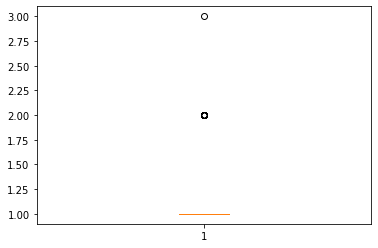

In [7]:
n_tar = []
for drug, targets in df_drugs.groupby('DrugName')['GeneName']:
    intersection_genes = set(targets).intersection(tar_genes)
    if intersection_genes:
        n_tar.append(len(intersection_genes))
print(np.mean(n_tar))
plt.boxplot(n_tar)

(-1.0, 10.0)

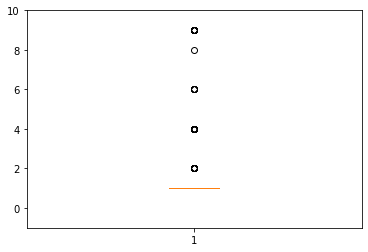

In [8]:
n_tar = []
for d in drug_list:
    n_tar.append(len(df_drugs[df_drugs['DrugName'] == d]))

np.mean(n_tar)
plt.boxplot(n_tar)
plt.ylim(-1, 10)

### Exponential decay score

In [9]:
df_drug_scores_exponential = pd.DataFrame(drug_scores_exponential_list, 
                                          index=drug_list, 
                                          columns=df_scores_exponential.columns)
df_drug_scores_exponential

,alkaptonuria,homocystinuria,nonketotic hyperglycinemia,phenylketonuria,tyrosinemia I,tyrosinemia II,tyrosinemia III
(S)-(+)-Dimethindene maleate,0.001060,0.210078,0.116027,0.118229,0.113809,0.248197,0.239275
99mTc-fanolesomab,0.001060,0.021556,0.007489,0.118229,0.001278,0.248197,0.000736
ABIRATERONE,0.404165,0.317359,0.166727,0.628150,0.776883,0.248197,0.239275
ACECLIDINE,0.679027,0.401225,0.273655,0.810341,0.993502,0.790538,0.834230
ANGIOTENSIN II,0.679027,0.463419,0.467332,0.807926,0.776883,0.248197,0.239275
...,...,...,...,...,...,...,...
Zolmitriptan,0.679027,0.243646,0.273655,0.016618,0.113809,0.248197,0.239275
Zotarolimus,0.999879,0.993980,0.996423,0.924337,0.999997,0.939731,0.964917
lifitegrast,1.000000,0.243646,0.610911,0.673310,0.113809,0.248197,0.239275
nusinersen,0.550944,0.432035,0.297133,0.662435,0.393862,0.567643,0.599157


In [19]:
#df_best_exponential = df_drug_scores_exponential[
#    (df_drug_scores_exponential['alkaptonuria'] > 0.95) |
#    (df_drug_scores_exponential['homocystinuria'] > 0.95) |
#    (df_drug_scores_exponential['nonketotic hyperglycinemia'] > 0.95) |
#    (df_drug_scores_exponential['phenylketonuria'] > 0.95) |
#    (df_drug_scores_exponential['tyrosinemia I'] > 0.95) |
#    (df_drug_scores_exponential['tyrosinemia II'] > 0.95) |
#    (df_drug_scores_exponential['tyrosinemia III'] > 0.95)]

#df_best_exponential = df_drug_scores_exponential[
#    (df_drug_scores_exponential['alkaptonuria'] > df_drug_scores_exponential.quantile(0.95)['alkaptonuria']) |
#    (df_drug_scores_exponential['homocystinuria'] > df_drug_scores_exponential.quantile(0.95)['homocystinuria']) |
#    (df_drug_scores_exponential['nonketotic hyperglycinemia'] > df_drug_scores_exponential.quantile(0.95)['nonketotic hyperglycinemia']) |
#    (df_drug_scores_exponential['phenylketonuria'] > df_drug_scores_exponential.quantile(0.95)['phenylketonuria']) |
#    (df_drug_scores_exponential['tyrosinemia I'] > df_drug_scores_exponential.quantile(0.95)['tyrosinemia I']) |
#    (df_drug_scores_exponential['tyrosinemia II'] > df_drug_scores_exponential.quantile(0.95)['tyrosinemia II']) |
#    (df_drug_scores_exponential['tyrosinemia III'] > df_drug_scores_exponential.quantile(0.95)['tyrosinemia III'])]

In [10]:
def get_best_drugs(df, q=0.95):
    best_drugs = {}
    for c in df.columns:
        df_best = df[df[c] > df.quantile(q)[c]][c]
        best_drugs[c] = df_best
    return best_drugs
best_ed = get_best_drugs(df_drug_scores_exponential)

### Average shortest path ranking

In [11]:
target_set = set(tar_genes)
drug_list = []
drug_scores_shortest_path_list = []
for drug, targets in df_drugs.groupby('DrugName')['GeneName']:
    intersection_genes = set(targets).intersection(tar_genes)
    if intersection_genes:
        drug_list.append(drug)
        drug_scores_shortest_path_list.append(df_scores_shortest_path.loc[list(intersection_genes), :].max().values)

In [12]:
df_drug_scores_shortest_path = pd.DataFrame(drug_scores_shortest_path_list, index=drug_list, columns=df_scores_shortest_path.columns)
df_drug_scores_shortest_path

,alkaptonuria,homocystinuria,nonketotic hyperglycinemia,phenylketonuria,tyrosinemia I,tyrosinemia II,tyrosinemia III
(S)-(+)-Dimethindene maleate,0.000007,0.268185,1.327958e-01,0.148496,1.080804e-01,0.307855,3.082494e-01
99mTc-fanolesomab,0.000007,0.018681,1.589052e-07,0.148496,2.566465e-11,0.307855,5.566580e-12
ABIRATERONE,0.443428,0.293066,9.010900e-02,0.675620,8.146838e-01,0.307855,3.082494e-01
ACECLIDINE,0.818410,0.387663,3.502618e-01,0.896911,9.971176e-01,0.823984,8.580806e-01
ANGIOTENSIN II,0.818410,0.524181,5.268939e-01,0.894107,8.146838e-01,0.307855,3.082494e-01
...,...,...,...,...,...,...,...
Zolmitriptan,0.818410,0.301927,3.502618e-01,0.004573,1.080804e-01,0.307855,3.082494e-01
Zotarolimus,0.996116,0.996837,9.979481e-01,0.951357,9.999952e-01,0.950216,9.684164e-01
lifitegrast,1.000000,0.301927,6.327948e-01,0.818416,1.080804e-01,0.307855,3.082494e-01
nusinersen,0.658568,0.467579,3.502618e-01,0.775098,4.123437e-01,0.624259,6.546052e-01


In [65]:
#df_best_shortest_path = df_drug_scores_shortest_path[
#    (df_drug_scores_shortest_path['alkaptonuria'] > 0.95) |
#    (df_drug_scores_shortest_path['homocystinuria'] > 0.95) |
#    (df_drug_scores_shortest_path['nonketotic hyperglycinemia'] > 0.95) |
#    (df_drug_scores_shortest_path['phenylketonuria'] > 0.95) |
#    (df_drug_scores_shortest_path['tyrosinemia I'] > 0.95) |
#    (df_drug_scores_shortest_path['tyrosinemia II'] > 0.95) |
#    (df_drug_scores_shortest_path['tyrosinemia III'] > 0.95)]

#df_best_shortest_path = df_drug_scores_shortest_path[
#    (df_drug_scores_shortest_path['alkaptonuria'] > df_drug_scores_shortest_path.quantile(0.95)['alkaptonuria']) |
#    (df_drug_scores_shortest_path['homocystinuria'] > df_drug_scores_shortest_path.quantile(0.95)['homocystinuria']) |
#    (df_drug_scores_shortest_path['nonketotic hyperglycinemia'] > df_drug_scores_shortest_path.quantile(0.95)['nonketotic hyperglycinemia']) |
#    (df_drug_scores_shortest_path['phenylketonuria'] > df_drug_scores_shortest_path.quantile(0.95)['phenylketonuria']) |
#    (df_drug_scores_shortest_path['tyrosinemia I'] > df_drug_scores_shortest_path.quantile(0.95)['tyrosinemia I']) |
#    (df_drug_scores_shortest_path['tyrosinemia II'] > df_drug_scores_shortest_path.quantile(0.95)['tyrosinemia II']) |
#    (df_drug_scores_shortest_path['tyrosinemia III'] > df_drug_scores_shortest_path.quantile(0.95)['tyrosinemia III'])]

In [13]:
best_sp = get_best_drugs(df_drug_scores_shortest_path)

### Compare the results

In [14]:
n_found_drugs_ed = sum([len(df) for _, df in best_ed.items()])
n_found_drugs_sp = sum([len(df) for _, df in best_sp.items()])
print(n_found_drugs_ed, n_found_drugs_sp)


160 165


In [15]:
def jacc(S: set, T: set):
    inters = S.intersection(T)
    union = S.union(T)
    return len(inters)/len(union)

for key in best_ed:
    best_drugs_ed = set(best_ed[key].index)
    best_drugs_sp = set(best_sp[key].index)
    print(f'{key:26}', len(best_drugs_ed), len(best_drugs_sp), f'{jacc(best_drugs_ed, best_drugs_sp):.2f}')
    

alkaptonuria               29 29 1.00
homocystinuria             31 31 0.13
nonketotic hyperglycinemia 23 22 0.96
phenylketonuria            19 19 1.00
tyrosinemia I              18 31 0.26
tyrosinemia II             26 19 0.73
tyrosinemia III            14 14 1.00


In [36]:
def print_drugs(disease):
    print(set(best_ed[disease].index).union(best_sp[disease].index))

for dis in df_drug_scores_exponential.columns:
    print(dis)
    print_drugs(dis)
    print()

alkaptonuria
{'Adenosine', 'DEOXYCYTIDINE', 'Orlistat', 'Dulaglutide', 'Dasatinib', 'Exenatide', 'SR141716A', 'Penciclovir', 'Propylthiouracil', 'L-Phenylalanine', 'Vidarabine', 'Metyrosine', 'Florbetapir F-18', 'Methimazole', 'Marinol', 'Carbimazole', 'Lixisenatide', 'lifitegrast', 'Carbidopa', 'Semaglutide', 'Vitamin B6', 'Monobenzone', 'Tetrahydrobiopterin', 'Nitisinone', 'Pramlintide', 'Liraglutide', 'L-Tyrosine', 'Hydroquinone', 'NABILONE'}

homocystinuria
{'Nandrolone', 'Prednisone', 'Testosterone', 'Bestatin', 'Nilutamide', 'Florbetapir F-18', 'Meprednisone', 'Flunisolide', 'Cyproterone', 'GW685698X', 'Flufenamic Acid', 'Mometasone', 'Hydrocortisone', 'Dromostanolone', 'Ethylestrenol', 'Oxandrolone', 'Betamethasone Benzoate', 'Prasterone', 'Hydrocortamate', 'Fluoxymesterone', 'Budesonide', 'Methylprednisolone', 'Betamethasone', 'Fluticasone', 'Flutamide', 'Mifepristone', 'Everolimus', 'Prednisolone', 'Acitretin', 'Dexamethasone', 'Larotrectinib', 'Enzalutamide', 'Triamcinolone',

In [28]:
import networkx as nx
G = nx.read_gpickle('data/protein_graph')

def check_disease_drug(disease, drug):
    # Check if the drug exists in our dataset
    if not len(df_drugs[df_drugs['DrugName'] == drug]):
        print(f'{drug} not in the dataset')
        return

    # Get the genes associated with the drug
    gene_set = set(df_drugs[df_drugs['DrugName'] == drug]['GeneName'])
    print('Gene set of the drug', gene_set)
    one_present = False
    for gene in gene_set:
        if gene in G.nodes():
            print(f'{gene} in the graph')
            one_present = True
        else:
            print(f'{gene} not in the graph')
    if not one_present:
        print('No genes matched')
        return
    print()
    # Check scores
    print(f'Disease {disease}, drug {drug}')
    print(f'Exponential decay score {df_drug_scores_exponential.loc[drug, disease]:.3f}')
    print(f'Shortest path score {df_drug_scores_shortest_path.loc[drug, disease]:.3f}')

    # Check if relevant
    print('Drug relevant' if drug in best_ed[disease].index else 'Drug not relevant', '(ed score)')
    print('Drug relevant' if drug in best_sp[disease].index else 'Drug not relevant', '(sp score)')


check_disease_drug('nonketotic hyperglycinemia', 'Fluorouracil')
    

Gene set of the drug {'TYMS', 'DPYD', 'CandiTMP1', 'EST2'}
TYMS in the graph
DPYD not in the graph
CandiTMP1 not in the graph
EST2 not in the graph

Disease nonketotic hyperglycinemia, drug Fluorouracil
Exponential decay score 1.000
Shortest path score 1.000
Drug relevant (ed score)
Drug relevant (sp score)


### Validation

In [17]:
drug_set = set(df_drugs['DrugName'])

In [18]:
pc = pd.read_csv('chemicals/phenylketonuria_chemicals.csv')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['phenylketonuria'] > df_drug_scores_exponential.quantile(0.95)['phenylketonuria']]['phenylketonuria'].index
set(dd).intersection(pc)

set()

In [33]:
pc = pd.read_csv('chemicals/homocystinuria_chemicals.csv')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['homocystinuria'] > df_drug_scores_exponential.quantile(0.95)['homocystinuria']]['homocystinuria'].index
set(dd).intersection(pc)

{'Flutamide', 'Testosterone'}

In [34]:
pc = pd.read_csv('chemicals/alkaptonuria_chemicals.tsv', sep='\t')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['alkaptonuria'] > df_drug_scores_exponential.quantile(0.95)['alkaptonuria']]['alkaptonuria'].index
set(dd).intersection(pc)

{'Propylthiouracil'}

In [27]:
pc = pd.read_csv('chemicals/nonketotic_chemicals.csv')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['nonketotic hyperglycinemia'] > df_drug_scores_exponential.quantile(0.95)['nonketotic hyperglycinemia']]['nonketotic hyperglycinemia'].index
set(dd).intersection(pc)

{'Fluorouracil'}

In [27]:
pc = pd.read_csv('chemicals/alkaptonuria_chemicals.tsv', sep='\t')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['alkaptonuria'] > df_drug_scores_exponential.quantile(0.95)['alkaptonuria']]['alkaptonuria'].index
set(dd).intersection(pc)

{'Propylthiouracil'}

In [30]:
pc = pd.read_csv('chemicals/tyrosinemia_chemicals.csv')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['tyrosinemia I'] > df_drug_scores_exponential.quantile(0.95)['tyrosinemia I']]['tyrosinemia I'].index
set(dd).intersection(pc)

{'Vorinostat'}

In [32]:
pc = pd.read_csv('chemicals/tyrosinemia_chemicals.csv')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['tyrosinemia II'] > df_drug_scores_exponential.quantile(0.95)['tyrosinemia II']]['tyrosinemia II'].index
set(dd).intersection(pc)

{'Propylthiouracil'}

In [31]:
pc = pd.read_csv('chemicals/tyrosinemia_chemicals.csv')
pc = pc['Chemical Name']
pc = drug_set.intersection(set(pc))
dd = df_drug_scores_exponential[
    df_drug_scores_exponential['tyrosinemia III'] > df_drug_scores_exponential.quantile(0.95)['tyrosinemia III']]['tyrosinemia III'].index
set(dd).intersection(pc)

{'Propylthiouracil'}